## Introduction 

### Retail supermarket store data:

This report presents an exploratory data analysis (EDA) of the Sample Superstore dataset from Kaggle. The main objective is to identify sales patterns, evaluate the impact of discounts, and uncover opportunities to improve profitability and regional performance.

The goal of this analysis is to explore key business areas such as:

- Which product categories generate the most profit?
- Which regions have the highest sales?
- How do discounts affect profitability?
- What shipping methods are most commonly used?

By performing data cleaning, exploration, and visualization, we aim to extract actionable insights to help improve business strategies and decision-making.

## Importing libraries

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

In [324]:
df = pd.read_csv("C:\\Users\\Camila Gasparini\\Desktop\\meu_projeto\\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [325]:
# Take a look at data types:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

## Data Exploration

In [327]:
df.info() 
# df.info() - is a Pandas DataFrame method that provides a concise summary of the DataFrame's information
# It includes several important details about the DataFrame, such as:
# The total number of non-null values in each column.
# The data type of each column.
# The memory usage of the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [328]:
df.isnull().sum() #This code will return the count of missing values (NaN or None) for each column

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [329]:
# There is no missing values.

In [330]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Key Insights from Statistical Summary

#### Sales
- The standard deviation is more than 8 times the mean, which is considered extremely high.
Profits tend to vary significantly across transactions, meaning that there are many transactions with losses and others with very high profits.
- Most sales fall between 17.28 and 209.94.

#### Discount
- Maximum discount: 80%
- Some transactions receive very high discounts, which could negatively impact profitability.

#### Profit
- Average profit: 28.65
- Standard deviation: 234 - profit values vary significantly.
- Minimum: -6599.97
- Maximum: 8399.97
- There are transactions with significant losses, which deserve further attention.

## Data Visualization

#### 1) Which is the most used ship mode?

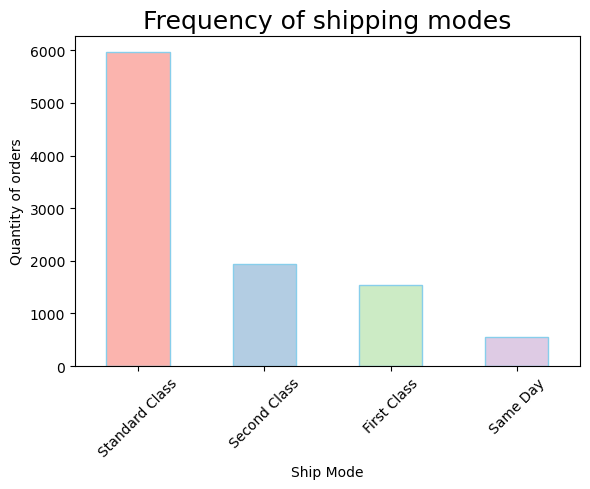

In [337]:
ship_counts = df["Ship Mode"].value_counts()

colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_10_cities)))

plt.figure(figsize=(6, 5))
ship_counts.plot(kind="bar", color=colors, edgecolor="skyblue")

plt.title("Frequency of shipping modes", fontsize=18)
plt.xlabel("Ship Mode")
plt.ylabel("Quantity of orders")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##### Insight: Standard Class: A general shipping option with variable delivery times and lower prices, ideal for orders that do not require urgent delivery.

#### 2) Which cities is the most profitable?

In [340]:
cities_profit = df.groupby("City")["Profit"].sum().sort_values(ascending=False).reset_index()

top_10_cities = cities_profit.head(10)

print(top_10_cities)

            City      Profit
0  New York City  62036.9837
1    Los Angeles  30440.7579
2        Seattle  29156.0967
3  San Francisco  17507.3854
4        Detroit  13181.7908
5      Lafayette  10018.3876
6        Jackson   7581.6828
7        Atlanta   6993.6629
8    Minneapolis   6824.5846
9      San Diego   6377.1960


#### 2.1) Bar Graph 

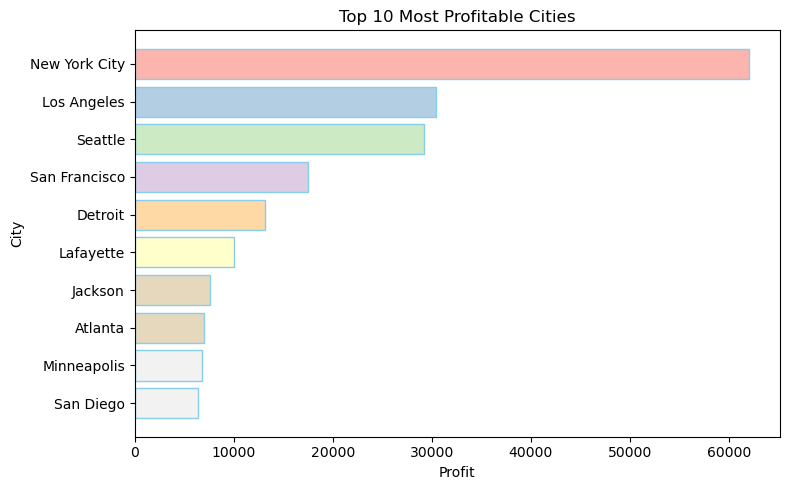

In [342]:
colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_10_cities)))

plt.figure(figsize=(8,5))
plt.barh(
    top_10_cities["City"],
    top_10_cities["Profit"],
    color=colors,
    edgecolor="skyblue"
)

plt.xlabel("Profit")
plt.ylabel("City")
plt.title("Top 10 Most Profitable Cities")

# Invert Y axis
plt.gca().invert_yaxis()

# Adjust layout and show
plt.tight_layout()

plt.show()

##### Insight: New York is considered the most profitable city, as shown in the chart, generating twice the profit of the second- and third-ranked cities.

#### 3) Which city is the less profitable?

In [345]:
cities_profit2 = df.groupby("City")["Profit"].sum().sort_values(ascending=True).reset_index()

top_10_cities2 = cities_profit2.head(10)

print(top_10_cities2)

           City      Profit
0  Philadelphia -13837.7674
1       Houston -10153.5485
2   San Antonio  -7299.0502
3     Lancaster  -7239.0684
4       Chicago  -6654.5688
5    Burlington  -3622.8772
6        Dallas  -2846.5257
7       Phoenix  -2790.8832
8        Aurora  -2691.7386
9  Jacksonville  -2323.8350


#### 3.1) Bar graph

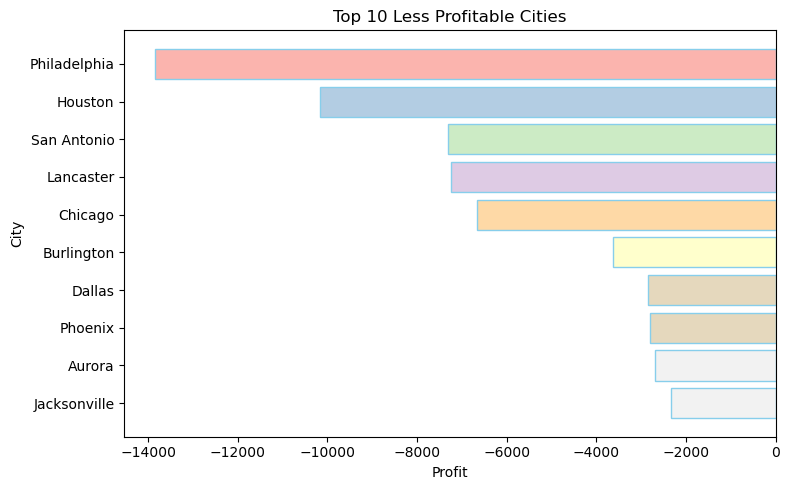

In [347]:
colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_10_cities)))

plt.figure(figsize=(8,5))
plt.barh(
    top_10_cities2["City"],
    top_10_cities2["Profit"],
    color=colors,
    edgecolor="skyblue"
)

plt.xlabel("Profit")
plt.ylabel("City")
plt.title("Top 10 Less Profitable Cities")

# Invert Y axis
plt.gca().invert_yaxis()

# Adjust layout and show
plt.tight_layout()

plt.show()

##### Insight: Philadelphia, Houston and San Antonio are considered the most profitable cities.

#### 4) Which state is the most profitable?

In [350]:
state_profit = df.groupby("State")["Profit"].sum().sort_values(ascending=False).reset_index()

top_10_state = state_profit.head(10)

print(top_10_state)

        State      Profit
0  California  76381.3871
1    New York  74038.5486
2  Washington  33402.6517
3    Michigan  24463.1876
4    Virginia  18597.9504
5     Indiana  18382.9363
6     Georgia  16250.0433
7    Kentucky  11199.6966
8   Minnesota  10823.1874
9    Delaware   9977.3748


#### 4.1) Bar Graph

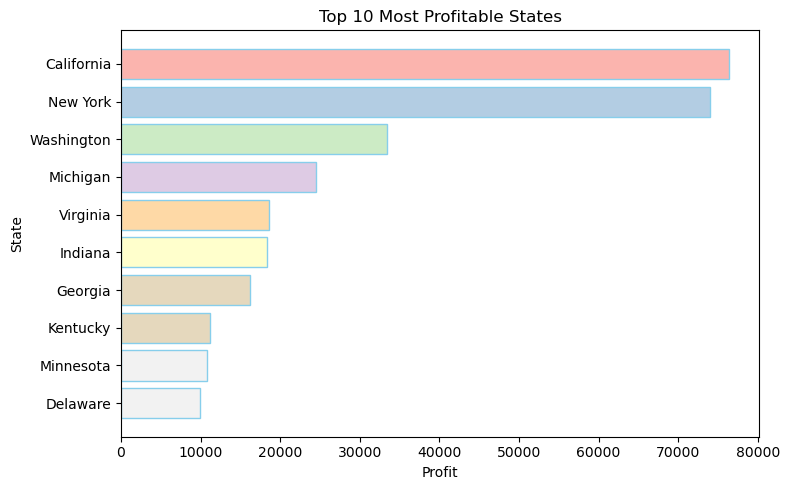

In [352]:
colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_10_cities)))

plt.figure(figsize=(8,5))
plt.barh(
    top_10_state["State"],
    top_10_state["Profit"],
    color=colors,
    edgecolor="skyblue"
)

plt.xlabel("Profit")
plt.ylabel("State")
plt.title("Top 10 Most Profitable States")

# Invert Y axis
plt.gca().invert_yaxis()

# Adjust layout and show
plt.tight_layout()

plt.show()

##### Insight: California and New York are considered the most profitable states.

#### 5) Which state is the less profitable?

In [355]:
state_profit2 = df.groupby("State")["Profit"].sum().sort_values(ascending=True).reset_index()

top_10_state2 = state_profit2.head(10)

print(top_10_state2)

            State      Profit
0           Texas -25729.3563
1            Ohio -16971.3766
2    Pennsylvania -15559.9603
3        Illinois -12607.8870
4  North Carolina  -7490.9122
5        Colorado  -6527.8579
6       Tennessee  -5341.6936
7         Arizona  -3427.9246
8         Florida  -3399.3017
9          Oregon  -1190.4705


#### 5.1) Bar Graph

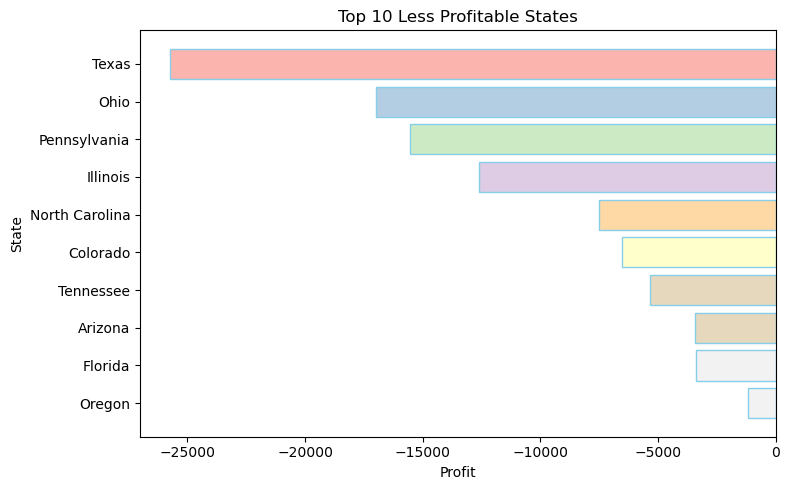

In [357]:
colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_10_cities)))

plt.figure(figsize=(8,5))
plt.barh(
    top_10_state2["State"],
    top_10_state2["Profit"],
    color=colors,
    edgecolor="skyblue"
)

plt.xlabel("Profit")
plt.ylabel("State")
plt.title("Top 10 Less Profitable States")

# Invert Y axis
plt.gca().invert_yaxis()

# Adjust layout and show
plt.tight_layout()

plt.show()

##### Insight: Texas is the least profitable state.

## Discounts X Profit

#### 6) Which city received the highest discounts?

In [361]:
cities_discount = df.groupby("City")["Discount"].mean().sort_values(ascending=False).reset_index()

top_10_cities3 = cities_discount.head(10)

print(top_10_cities3)

            City  Discount
0  Missouri City  0.800000
1     Romeoville  0.800000
2      Deer Park  0.800000
3        Abilene  0.800000
4         Elyria  0.700000
5      Littleton  0.700000
6   Ormond Beach  0.700000
7      Pensacola  0.700000
8          Tyler  0.640000
9          Bryan  0.616667


#### 6.1) Bar Graph

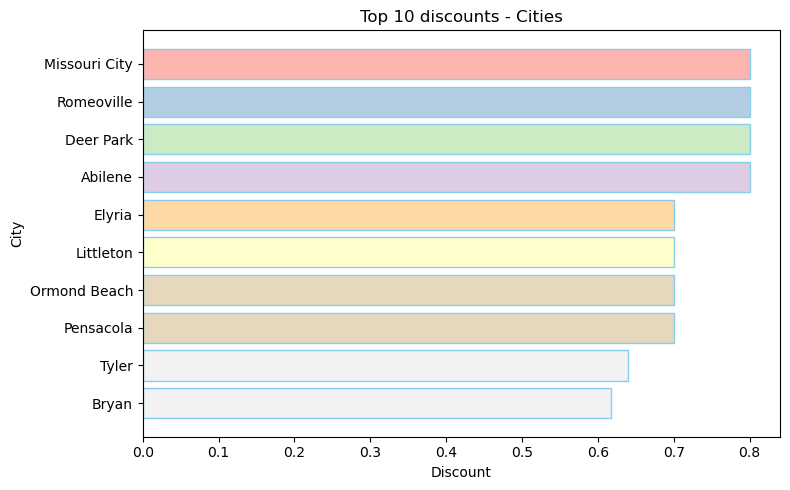

In [363]:
colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_10_cities)))

plt.figure(figsize=(8,5))
plt.barh(
    top_10_cities3["City"],
    top_10_cities3["Discount"],
    color=colors,
    edgecolor="skyblue"
)

plt.xlabel("Discount")
plt.ylabel("City")
plt.title("Top 10 discounts - Cities")

# Invert Y axis
plt.gca().invert_yaxis()

# Adjust layout and show
plt.tight_layout()

plt.show()

#### 7) Which state received the highest discounts?

In [365]:
state_discount = df.groupby("State")["Discount"].mean().sort_values(ascending=False).reset_index()

top_10_state3 = state_discount.head(10)

print(top_10_state3)

            State  Discount
0        Illinois  0.390041
1           Texas  0.370193
2    Pennsylvania  0.328620
3            Ohio  0.324947
4        Colorado  0.316484
5         Arizona  0.303571
6         Florida  0.299347
7       Tennessee  0.291257
8          Oregon  0.288710
9  North Carolina  0.283534


#### 7.1) Bar Graph

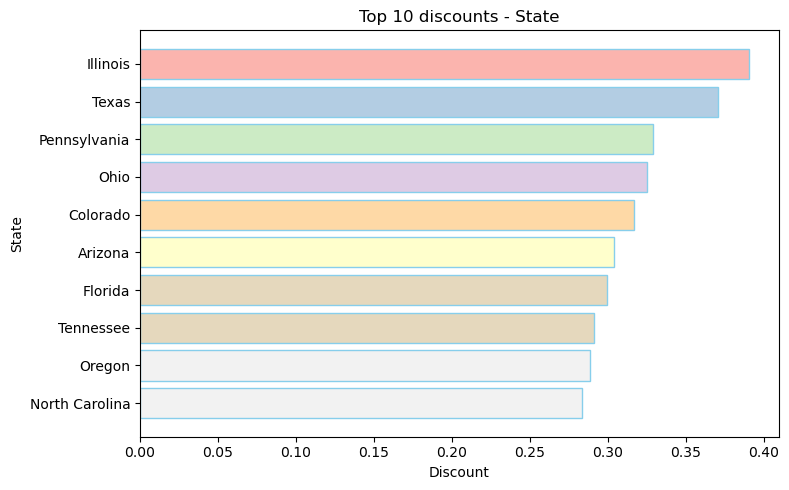

In [367]:
colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_10_cities)))

plt.figure(figsize=(8,5))
plt.barh(
    top_10_state3["State"],
    top_10_state3["Discount"],
    color=colors,
    edgecolor="skyblue"
)

plt.xlabel("Discount")
plt.ylabel("State")
plt.title("Top 10 discounts - State")

# Invert Y axis
plt.gca().invert_yaxis()

# Adjust layout and show
plt.tight_layout()

plt.show()

##### Insight: The least profitable states are Texas, Ohio, Pennsylvania and Illinois. 
##### They also have the highest discounts. 
##### Therefore, discounts and profit are inversely proportional.

## Product Categories X Profit/Sales/Discount

#### 8) Which product categories generate the most profit?

In [371]:
prodcat_profit = df.groupby("Category")["Profit"].sum().sort_values(ascending=False).reset_index()

top_3_prodcat = prodcat_profit.head(3)

print(top_3_prodcat)

          Category       Profit
0       Technology  145454.9481
1  Office Supplies  122490.8008
2        Furniture   18451.2728


#### 8.1) Bar Graph

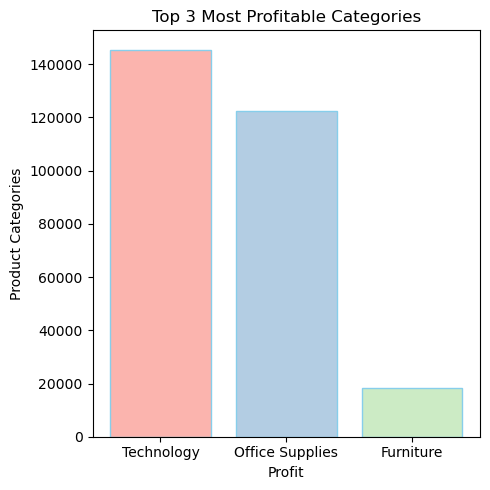

In [373]:
colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_10_cities)))

plt.figure(figsize=(5,5))
plt.bar(
    top_3_prodcat["Category"],
    top_3_prodcat["Profit"],
    color=colors,
    edgecolor="skyblue"
)

plt.xlabel("Profit")
plt.ylabel("Product Categories")
plt.title("Top 3 Most Profitable Categories")

# Adjust layout and show
plt.tight_layout()

plt.show()

#### 8.2) Which product categories have the highest sales?

In [375]:
prodcat2_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False).reset_index()

top_3_prodcat2 = prodcat2_sales.head(3)

print(top_3_prodcat2)

          Category        Sales
0       Technology  836154.0330
1        Furniture  741999.7953
2  Office Supplies  719047.0320


#### 8.2.1) Bar Graph

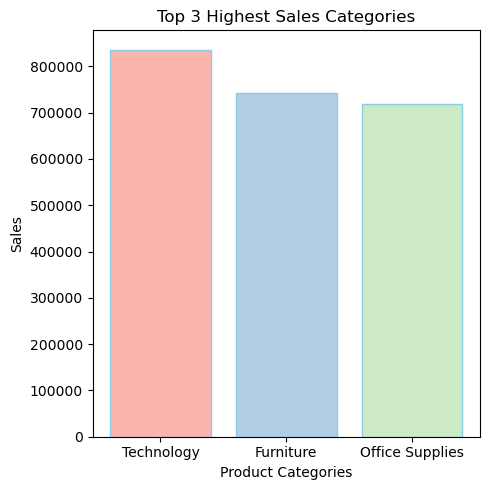

In [377]:
colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_10_cities)))

plt.figure(figsize=(5,5))
plt.bar(
    top_3_prodcat2["Category"],
    top_3_prodcat2["Sales"],
    color=colors,
    edgecolor="skyblue"
)

plt.xlabel("Product Categories")
plt.ylabel("Sales")
plt.title("Top 3 Highest Sales Categories")

# Adjust layout and show
plt.tight_layout()

plt.show()

##### Insight: Furniture and Office Suplies have almost the same quantity of sales, but when we analyze the profit: Office Supplies had approximately 564% more profit than Furniture.

#### 8.3) Which product categories have the highest discounts?

In [380]:
prodcat3_discounts = df.groupby("Category")["Discount"].mean().sort_values(ascending=False).reset_index()

top_3_prodcat3 = prodcat3_discounts.head(3)

print(top_3_prodcat3)

          Category  Discount
0        Furniture  0.173923
1  Office Supplies  0.157285
2       Technology  0.132323


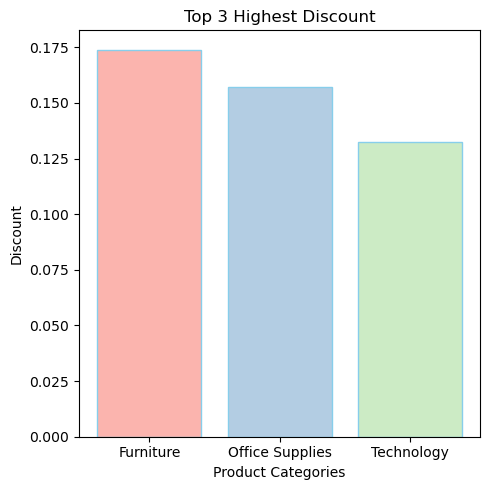

In [381]:
colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_10_cities)))

plt.figure(figsize=(5,5))
plt.bar(
    top_3_prodcat3["Category"],
    top_3_prodcat3["Discount"],
    color=colors,
    edgecolor="skyblue"
)

plt.xlabel("Product Categories")
plt.ylabel("Discount")
plt.title("Top 3 Highest Discount")

# Adjust layout and show
plt.tight_layout()

plt.show()

##### Insight: Furniture has the highest discounts.
##### Profit and discounts are inversely proportional.

#### 9) Which regions have the highest sales?

In [384]:
region_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False).reset_index()

top_10_regionsales = region_sales.head(10)

print(top_10_regionsales)

          State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140
5       Florida   89473.7080
6      Illinois   80166.1010
7          Ohio   78258.1360
8      Michigan   76269.6140
9      Virginia   70636.7200


#### 10) Correlation between Discount and Sales

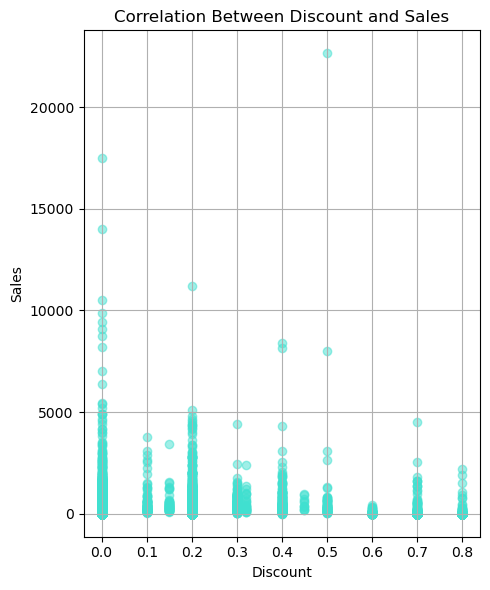

In [386]:
plt.figure(figsize=(5, 6))

#Create scatterplot
plt.scatter(df["Discount"],df["Sales"], alpha = 0.5, color = "turquoise")

plt.title("Correlation Between Discount and Sales")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


In [387]:
# Calculating the correlation
correlation = df["Discount"].corr(df["Sales"])
print("Correlation Coefficiente is: ",correlation)


Correlation Coefficiente is:  -0.02819012415753553


##### Insight: There is no significant linear relationship between discount and sales.

## Key Insights

- Office Supplies achieved 564% more profit than Furniture.

- Furniture had the highest average discount, yet failed to convert that into strong sales or profit.

- Discounts have little to no impact on sales, indicating that promotions may not be the key driver of revenue.

- Texas, Ohio, Pennsylvania and Illinois are the least profitable states despite aggressive discounting.

## Conclusion & Recommendations

- Reevaluate the effectiveness of discounts in low-performing categories such as Furniture.

- Focus on high-margin categories like Office Supplies to maximize profitability.

- Avoid excessive discounts in regions where they do not lead to increased sales or improved performance.

- Conduct further analysis to understand customer behavior in loss-making cities.

_____________________________________________

### Author: Camila dos Santos Gasparini